In [3]:
import pandas as pd

df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['label'] = lbl.fit_transform(df['label'])


In [10]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


features = df.drop('label', axis=1)
features_scaled = scaler.fit_transform(features)


data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled['label'] = df['label']


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue='label')
plt.show()



Output hidden; open in https://colab.research.google.com to view.

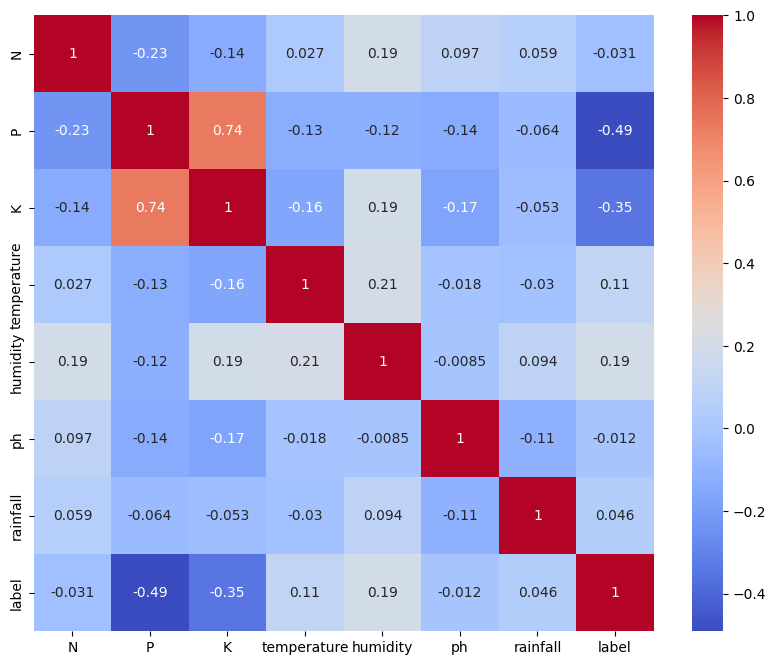

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data_scaled.drop('label', axis=1)
y = data_scaled['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=lbl.classes_))


Accuracy: 0.9931818181818182
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      